## About this demo
This is a draft for a demo using Claude to help with coding in a data science context. The goal is to show how genAI tools can help with common tasks such as:

**NO COPILOT** Have it off.

1. Dealing with errors
2. Annotating code
3. Suggesting code snippets
4. Explaining code outputs

We will also introduce some best practices for working with genAI tools in this context. 

The motivating example is motivated by Figure 1 of the [**Current State of Sea Ice Cover**](https://earth.gsfc.nasa.gov/cryo/data/current-state-sea-ice-cover).


![Figure 1 from Current State of Sea Ice Cover](NH_decadal_plot.png).

The first half of the demo consists in calculating the sea ice extent for January 2024, including data exploration. 

The second half of the demo builds upon the first half to calculate monthly sea ice extent in 2024. 

This demo purposefuly runs into errors or confusing code that genAI tools can help resolve.


## Data access

The data used for this exercise is the [Bootstrap Sea Ice Concentrations from Nimbus-7 SMMR and DMSP SSM/I-SSMIS, Version 4](https://nsidc.org/data/nsidc-0079/versions/4#anchor-documentation) from the National Snow and Ice Data Center (NSIDC). The [user guide](https://nsidc.org/sites/default/files/documents/user-guide/nsidc-0079-v004-userguide.pdf) is available through the dataset main page. 

![](https://nsidc.org/sites/default/files/documents/user-guide/nsidc-0079-v004-userguide.pdf)

The data was donwloaded using a Python script generated by the [NSIDC Data Search Tool for this dataset](https://nsidc.org/data/data-access-tool/NSIDC-0079/versions/4). The script downloads all 2024 data (montly and daily) for the Northern Hemisphere. The data files are in netCDF format and are stored in the `monthly_data` folder.

## Definitions

This article defines:

>Sea ice concentration is the percent areal coverage of ice within the data element (grid cell). Sea ice extent is the integral sum of the areas of all grid cells with at least 15% ice concentration, while sea ice area is the integral sum of the product of ice concentration and area of all grid cells with at least 15% ice concentration. 

## Part 1: Setup

### 1. Setting a system prompt

Setting a system prompt will set Claude's behavior across all interactions. To specify the system prompt: 

1. Click on your icon on the bottom left corner of the chat window and select settings. 

2. In the text box under *What personal preferences should Claude consider in responses?*, enter the following text:

> Keep responses concise and challenge me when there’s a better way to approach a problem. Avoid over-engineering. Only make changes that are directly requested or clearly necessary. Keep solutions simple and focused.

You can change this pre-prompt as needed and read more about prompting best practices in the [Calude Docs](https://platform.claude.com/docs/en/build-with-claude/prompt-engineering/claude-4-best-practices).

### 2. Create a project for the analysis

1. On the left-side panel click on *Projects* and then *New Project*. We will name this project *Sea Ice Extent Analysis*. For the project description we will write 
> Analyzing sea ice extent in the Northern Hemisphere across time using Bootstrap Sea Ice Concentrations data from the National Snow and Ice Data Center (NSIDC).

2. We will also specify project instructions. Here we will write:
> Provide code assistance for geospatial analysis to an intermediate Python programmer. Use well-established Python libraries that have robust online documentation when possible.

## Part 2: Data exploration

Sea ice extent for January 2024

*This starts with only the libraries we know off the top of our head, and we will use genAI tools to help us fill in the blanks as we go along.*

In [1]:
import os
import xarray as xr
import rioxarray as rioxr

In [10]:
ice0124 = xr.open_dataset(os.path.join('monthly_data', 'NSIDC0079_SEAICE_PS_N25km_202401_v4.0.nc'))
ice0124

<xarray.Dataset> Size: 1MB
Dimensions:     (time: 1, y: 448, x: 304)
Coordinates:
  * time        (time) datetime64[ns] 8B 2024-01-01
  * y           (y) float64 4kB 5.838e+06 5.812e+06 ... -5.312e+06 -5.338e+06
  * x           (x) float64 2kB -3.838e+06 -3.812e+06 ... 3.712e+06 3.738e+06
Data variables:
    F17_ICECON  (time, y, x) float64 1MB ...
    crs         |S1 1B ...
Attributes: (12/49)
    title:                     Bootstrap Sea Ice Concentrations from Nimbus-7...
    summary:                   These sea ice concentration data were derived ...
    id:                        10.5067/X5LG68MH013O
    license:                   Access Constraint: These data are freely, open...
    acknowledgment:            These data are produced by the NASA Cryospheri...
    metadata_link:             https://doi.org/10.5067/X5LG68MH013O
    ...                        ...
    geospatial_x_resolution:   25000.0 meters
    geospatial_y_resolution:   25000.0 meters
    geospatial_lat_min:        30.980564
    geospatial_lat_max:        90.0
    geospatial_lon_min:        -180.0
    geospatial_lon_max:        180.0

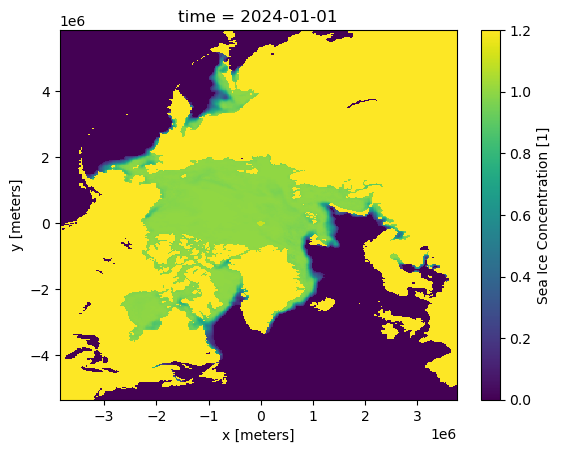

In [12]:
ice0124['F17_ICECON'].plot()

*Can I try giving it information about the attributes and dimensions of the dataset?*
What things are important for AI to understand the data you are working wihtout providing the whole datset. Is it copy-pasting attributes?

*Understading your data before you start working with it: missing values.*